In [12]:
import numpy as np

X = 5 * np.random.rand(100, 1)
y = 10 + 7 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[10.29128588],
       [ 6.87781816]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [14]:
y_predict

array([[10.29128588],
       [24.0469222 ]])

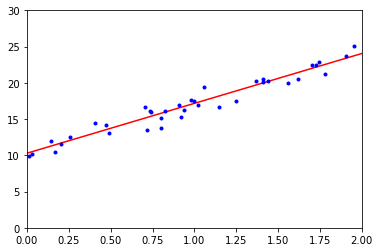

In [15]:
from matplotlib import pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 30])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([10.29128588]), array([[6.87781816]]))

In [17]:
lin_reg.predict(X_new)

array([[10.29128588],
       [24.0469222 ]])

<h3>Batch Gradient Descent</h3>

In [18]:
lr = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2, 1)

In [19]:
theta.shape

(2, 1)

In [20]:
theta

array([[ 0.66277344],
       [-0.7572126 ]])

In [21]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

In [22]:
theta

array([[10.29128588],
       [ 6.87781816]])

<h3>Stochastic Gradient Descent</h3>

In [23]:
# Learning Schedule hyperparameters
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # Random Initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients



In [24]:
theta

array([[10.32793294],
       [ 6.89709323]])

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([10.29722647]), array([6.97597399]))